## Brasília bike system | Decision tree implementation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Math operations
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import function train_test_split 
from sklearn.metrics import confusion_matrix, classification_report # Import scikit-learn metrics to calculate confusion matrix
from sklearn import metrics # Import scikit-learn metrics to calculate accuracy
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/udacityproject/submission_template.csv
/kaggle/input/udacityproject/df_submission.csv
/kaggle/input/udacityproject/df_train.csv


## Import training data

In [2]:
train_df = pd.read_csv('/kaggle/input/udacityproject/df_train.csv')
train_df.head()

,ride_date,tavg,tmin,tmax,wspd,pres,dia_da_semana,classe
0,2018-05-09,19.8,16.0,24.4,10.8,1018.3,2,1
1,2018-05-10,18.3,14.0,24.0,14.0,1020.7,3,0
2,2018-05-11,19.7,12.9,25.1,5.9,1018.4,4,0
3,2018-05-12,19.9,13.4,25.6,5.1,1016.9,5,0
4,2018-05-13,20.0,13.9,26.4,5.9,1016.6,6,0


In [3]:
# Analizing dataframe descriptors
train_df.describe()

,tavg,tmin,tmax,wspd,pres,dia_da_semana,classe
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,18.671765,12.341176,25.322353,7.618803,1019.001658,2.988235,0.517647
std,1.398946,2.407196,1.616388,2.210445,2.309646,2.002939,0.502654
min,15.500000,6.300000,21.800000,2.000000,1013.400000,0.000000,0.000000
25%,18.000000,10.300000,24.400000,5.900000,1017.748182,1.000000,0.000000
50%,18.800000,12.600000,25.100000,7.400000,1019.000000,3.000000,1.000000
75%,19.700000,14.400000,26.300000,9.100000,1020.600000,5.000000,1.000000
max,21.400000,17.100000,30.500000,14.000000,1023.600000,6.000000,1.000000


## Changing columnms

In [19]:
# Deleting data column and changing others
train_df = train_df.rename(columns = {'dia_da_semana':'day_of_the_week',
                                        'classe':'label'})
train_df.drop(columns=['ride_date'],inplace=True)
train_df.head()

,tavg,tmin,tmax,wspd,pres,day_of_the_week,label
0,19.8,16.0,24.4,10.8,1018.3,2,1
1,18.3,14.0,24.0,14.0,1020.7,3,0
2,19.7,12.9,25.1,5.9,1018.4,4,0
3,19.9,13.4,25.6,5.1,1016.9,5,0
4,20.0,13.9,26.4,5.9,1016.6,6,0


## Histogram

array([[<AxesSubplot:title={'center':'tavg'}>,
        <AxesSubplot:title={'center':'tmin'}>,
        <AxesSubplot:title={'center':'tmax'}>],
       [<AxesSubplot:title={'center':'wspd'}>,
        <AxesSubplot:title={'center':'pres'}>,
        <AxesSubplot:title={'center':'day_of_the_week'}>],
       [<AxesSubplot:title={'center':'label'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

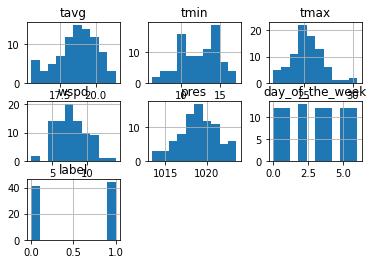

In [20]:
train_df.hist()

## Feature selection

In [21]:
# Split dataset in features and target variable
features_cols = ['tavg', 'tmin', 'tmax', 'wspd', 'pres', 'day_of_the_week']
X = train_df[features_cols] # Features
Y = train_df.label # Target variable

## Splitting Data

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=6) # 70% training and 30% test

## Building Decision Tree Model

In [23]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=2, min_impurity_decrease=0.0, min_samples_split=2)

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

# Predict the response for test dataset
Y_pred = dtc.predict(X_test)

## Evaluating Model

In [24]:
# Test Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

Accuracy: 0.8846153846153846


In [25]:
# Train Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_train,dtc.predict(X_train)))

Accuracy: 0.847457627118644


## Confusion Matrix

In [26]:
cm = confusion_matrix(y_test,Y_pred)
cm

array([[10,  2],
       [ 1, 13]])

In [27]:
# Analyzing amount of true positives
y_test.value_counts()

1    14
0    12
Name: label, dtype: int64

In [28]:
# Frequency of false positives and negatives and true negatives
unique_elements, counts_elements = np.unique(Y_pred,return_counts=True)
print("Frequency of unique values:")
print(np.asarray((unique_elements,counts_elements)))

Frequency of unique values:
[[ 0  1]
 [11 15]]


In [29]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.87      0.93      0.90        14

    accuracy                           0.88        26
   macro avg       0.89      0.88      0.88        26
weighted avg       0.89      0.88      0.88        26



## Plotting the correlation between temperature, atmospheric pressure, and days of the week in Brasília.

In [34]:
train_df.head()

,tavg,tmin,tmax,wspd,pres,day_of_the_week,label
0,19.8,16.0,24.4,10.8,1018.3,2,1
1,18.3,14.0,24.0,14.0,1020.7,3,0
2,19.7,12.9,25.1,5.9,1018.4,4,0
3,19.9,13.4,25.6,5.1,1016.9,5,0
4,20.0,13.9,26.4,5.9,1016.6,6,0


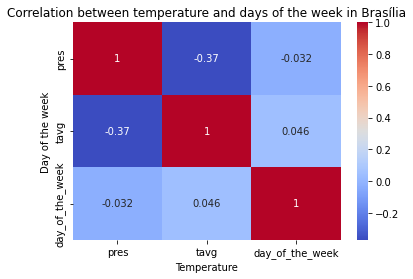

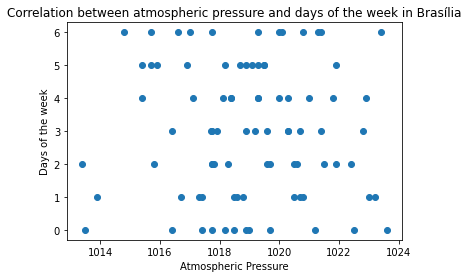

In [33]:
# Check the dataset
train_df.head()

# Create a correlation matrix
corr_matrix = train_df[['pres', 'tavg', 'day_of_the_week']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Plot the correlation between temperature, humidity, and demand
plt.scatter(train_df['tavg'], train_df['day_of_the_week'])
plt.xlabel('Temperature')
plt.ylabel('Day of the week')
plt.title('Correlation between temperature and days of the week in Brasília')
plt.show()

plt.scatter(train_df['pres'], train_df['day_of_the_week'])
plt.xlabel('Atmospheric Pressure')
plt.ylabel('Days of the week')
plt.title('Correlation between atmospheric pressure and days of the week in Brasília')
plt.show()

### Exploratory Data Analysis

<AxesSubplot:xlabel='tavg', ylabel='wspd'>

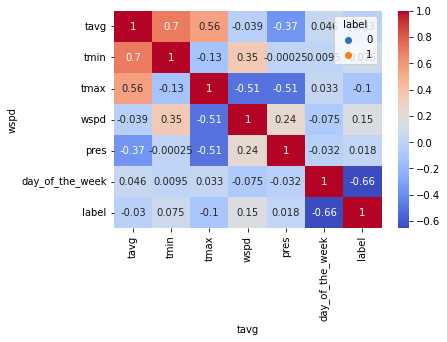

In [36]:
# Create a correlation matrix
corr = train_df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='tavg', ylabel='wspd'>

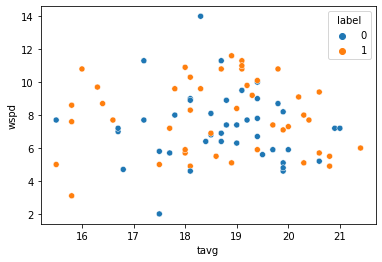

In [39]:
# Plot a scatter plot of temperature and wind speed against label
sns.scatterplot(data=train_df, x='tavg', y='wspd', hue='label')

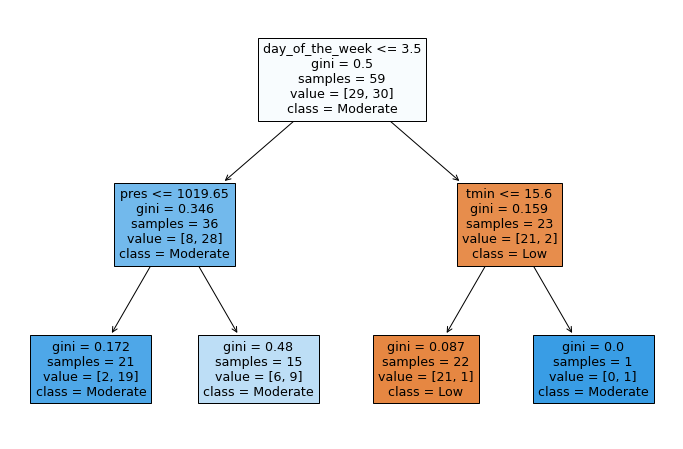

In [38]:
# Plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dtc, feature_names=X.columns, class_names=['Low', 'Moderate', 'High'], filled=True)
plt.show()